In [1]:
#configuración en google colab de spark y pyspark
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#instalar java y spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [5]:
spark

In [6]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [7]:
#Punto 1: Cargar datos
df=spark.read.csv('/content/Casos_positivos_de_COVID-19_en_Colombia.csv',inferSchema=True,header=True)

In [8]:
#Punto 2: Analisis
#2.1 Columnas
df.columns

['fecha reporte web',
 'ID de caso',
 'Fecha de notificación',
 'Código DIVIPOLA departamento',
 'Nombre departamento',
 'Código DIVIPOLA municipio',
 'Nombre municipio',
 'Edad',
 'Unidad de medida de edad',
 'Sexo',
 'Tipo de contagio',
 'Ubicación del caso',
 'Estado',
 'Código ISO del país',
 'Nombre del país',
 'Recuperado',
 'Fecha de inicio de síntomas',
 'Fecha de muerte',
 'Fecha de diagnóstico',
 'Fecha de recuperación',
 'Tipo de recuperación',
 'Pertenencia étnica',
 'Nombre del grupo étnico']

In [9]:
#2.2 Tipo de datos
import pandas as pd
df.dtypes


[('fecha reporte web', 'string'),
 ('ID de caso', 'int'),
 ('Fecha de notificación', 'string'),
 ('Código DIVIPOLA departamento', 'int'),
 ('Nombre departamento', 'string'),
 ('Código DIVIPOLA municipio', 'int'),
 ('Nombre municipio', 'string'),
 ('Edad', 'int'),
 ('Unidad de medida de edad', 'int'),
 ('Sexo', 'string'),
 ('Tipo de contagio', 'string'),
 ('Ubicación del caso', 'string'),
 ('Estado', 'string'),
 ('Código ISO del país', 'int'),
 ('Nombre del país', 'string'),
 ('Recuperado', 'string'),
 ('Fecha de inicio de síntomas', 'string'),
 ('Fecha de muerte', 'string'),
 ('Fecha de diagnóstico', 'string'),
 ('Fecha de recuperación', 'string'),
 ('Tipo de recuperación', 'string'),
 ('Pertenencia étnica', 'int'),
 ('Nombre del grupo étnico', 'string')]

In [10]:
#2.3 Seleccionar Columnas
df_selection = df[['Edad', 'Recuperado']]
df_selection

DataFrame[Edad: int, Recuperado: string]

In [11]:
#2.4 Renombrar columnas
df = df.withColumnRenamed("Sexo", "Genero").withColumnRenamed("Nombre departamento", "Departamento")

In [12]:
#Actualizacion de columnas
df.columns

['fecha reporte web',
 'ID de caso',
 'Fecha de notificación',
 'Código DIVIPOLA departamento',
 'Departamento',
 'Código DIVIPOLA municipio',
 'Nombre municipio',
 'Edad',
 'Unidad de medida de edad',
 'Genero',
 'Tipo de contagio',
 'Ubicación del caso',
 'Estado',
 'Código ISO del país',
 'Nombre del país',
 'Recuperado',
 'Fecha de inicio de síntomas',
 'Fecha de muerte',
 'Fecha de diagnóstico',
 'Fecha de recuperación',
 'Tipo de recuperación',
 'Pertenencia étnica',
 'Nombre del grupo étnico']

In [13]:
#2.5 Agregar columna
df.withColumn('NewCopy_Recuperado', df.Recuperado).withColumn('NewCopy_Departamento', df.Departamento).show()
df.columns

+-------------------+----------+---------------------+----------------------------+---------------+-------------------------+-----------------+----+------------------------+------+----------------+------------------+------+-------------------+---------------+----------+---------------------------+---------------+--------------------+---------------------+--------------------+------------------+-----------------------+------------------+--------------------+
|  fecha reporte web|ID de caso|Fecha de notificación|Código DIVIPOLA departamento|   Departamento|Código DIVIPOLA municipio| Nombre municipio|Edad|Unidad de medida de edad|Genero|Tipo de contagio|Ubicación del caso|Estado|Código ISO del país|Nombre del país|Recuperado|Fecha de inicio de síntomas|Fecha de muerte|Fecha de diagnóstico|Fecha de recuperación|Tipo de recuperación|Pertenencia étnica|Nombre del grupo étnico|NewCopy_Recuperado|NewCopy_Departamento|
+-------------------+----------+---------------------+----------------------

['fecha reporte web',
 'ID de caso',
 'Fecha de notificación',
 'Código DIVIPOLA departamento',
 'Departamento',
 'Código DIVIPOLA municipio',
 'Nombre municipio',
 'Edad',
 'Unidad de medida de edad',
 'Genero',
 'Tipo de contagio',
 'Ubicación del caso',
 'Estado',
 'Código ISO del país',
 'Nombre del país',
 'Recuperado',
 'Fecha de inicio de síntomas',
 'Fecha de muerte',
 'Fecha de diagnóstico',
 'Fecha de recuperación',
 'Tipo de recuperación',
 'Pertenencia étnica',
 'Nombre del grupo étnico']

In [14]:
#2.6 Borrar columna
df_borrado=df.drop('Genero')
df_borrado.columns

['fecha reporte web',
 'ID de caso',
 'Fecha de notificación',
 'Código DIVIPOLA departamento',
 'Departamento',
 'Código DIVIPOLA municipio',
 'Nombre municipio',
 'Edad',
 'Unidad de medida de edad',
 'Tipo de contagio',
 'Ubicación del caso',
 'Estado',
 'Código ISO del país',
 'Nombre del país',
 'Recuperado',
 'Fecha de inicio de síntomas',
 'Fecha de muerte',
 'Fecha de diagnóstico',
 'Fecha de recuperación',
 'Tipo de recuperación',
 'Pertenencia étnica',
 'Nombre del grupo étnico']

In [15]:
#2.7 Filtrados
#2.7.1 Solo Genero Masculino
df.filter(df['Genero']=='M').show()

+-------------------+----------+---------------------+----------------------------+------------+-------------------------+----------------+----+------------------------+------+----------------+------------------+---------+-------------------+---------------+----------+---------------------------+-------------------+--------------------+---------------------+--------------------+------------------+-----------------------+
|  fecha reporte web|ID de caso|Fecha de notificación|Código DIVIPOLA departamento|Departamento|Código DIVIPOLA municipio|Nombre municipio|Edad|Unidad de medida de edad|Genero|Tipo de contagio|Ubicación del caso|   Estado|Código ISO del país|Nombre del país|Recuperado|Fecha de inicio de síntomas|    Fecha de muerte|Fecha de diagnóstico|Fecha de recuperación|Tipo de recuperación|Pertenencia étnica|Nombre del grupo étnico|
+-------------------+----------+---------------------+----------------------------+------------+-------------------------+----------------+----+------

In [16]:
#2.7.2 Masculinos Fallecidos
df.filter((df['Genero']=='M')&(df['Estado']=='Fallecido')).show()

+-------------------+----------+---------------------+----------------------------+---------------+-------------------------+-----------------+----+------------------------+------+----------------+------------------+---------+-------------------+---------------+----------+---------------------------+-------------------+--------------------+---------------------+--------------------+------------------+-----------------------+
|  fecha reporte web|ID de caso|Fecha de notificación|Código DIVIPOLA departamento|   Departamento|Código DIVIPOLA municipio| Nombre municipio|Edad|Unidad de medida de edad|Genero|Tipo de contagio|Ubicación del caso|   Estado|Código ISO del país|Nombre del país|Recuperado|Fecha de inicio de síntomas|    Fecha de muerte|Fecha de diagnóstico|Fecha de recuperación|Tipo de recuperación|Pertenencia étnica|Nombre del grupo étnico|
+-------------------+----------+---------------------+----------------------------+---------------+-------------------------+-----------------

In [17]:
#2.8 Lambds
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType,DoubleType,IntegerType
Region_udf = udf(lambda Departamento: "Paisa" if Departamento == 'ANTIOQUIA' else "NO", StringType())
df.withColumn("Departamento", Region_udf(df.Departamento)).show(10,False)

+-------------------+----------+---------------------+----------------------------+------------+-------------------------+----------------+----+------------------------+------+----------------+------------------+------+-------------------+---------------+----------+---------------------------+---------------+--------------------+---------------------+--------------------+------------------+-----------------------+
|fecha reporte web  |ID de caso|Fecha de notificación|Código DIVIPOLA departamento|Departamento|Código DIVIPOLA municipio|Nombre municipio|Edad|Unidad de medida de edad|Genero|Tipo de contagio|Ubicación del caso|Estado|Código ISO del país|Nombre del país|Recuperado|Fecha de inicio de síntomas|Fecha de muerte|Fecha de diagnóstico|Fecha de recuperación|Tipo de recuperación|Pertenencia étnica|Nombre del grupo étnico|
+-------------------+----------+---------------------+----------------------------+------------+-------------------------+----------------+----+--------------------

## Punto 3 

In [21]:
#3.1 Top 10 departamentos con mas casos de covid de mayor a menor
df.groupBy('Departamento').count().orderBy('count',ascending=False).show(10,False)

+------------+-----+
|Departamento|count|
+------------+-----+
|BOGOTA      |82394|
|ANTIOQUIA   |46281|
|VALLE       |19172|
|BARRANQUILLA|15566|
|CUNDINAMARCA|12337|
|SANTANDER   |9711 |
|ATLANTICO   |8829 |
|TOLIMA      |6759 |
|CARTAGENA   |6575 |
|RISARALDA   |6347 |
+------------+-----+
only showing top 10 rows



In [22]:
#3.2  Top 10 ciudades con mas casos de covid de mayor a menor
df.groupBy('Nombre municipio').count().orderBy('count',ascending=False).show(10,False)

+----------------+-----+
|Nombre municipio|count|
+----------------+-----+
|BOGOTA          |82394|
|MEDELLIN        |25942|
|BARRANQUILLA    |15566|
|CALI            |14158|
|CARTAGENA       |6575 |
|IBAGUE          |4772 |
|SOLEDAD         |4206 |
|MANIZALES       |4203 |
|PEREIRA         |4151 |
|BUCARAMANGA     |4115 |
+----------------+-----+
only showing top 10 rows



In [40]:
#3.3  Top 10 fechas con mas casos de covid de mayor a menor
df.groupBy('Fecha de notificación').count().orderBy('count',ascending=False).show(10,False)

+---------------------+-----+
|Fecha de notificación|count|
+---------------------+-----+
|2021-04-06 00:00:00  |6401 |
|2021-04-07 00:00:00  |5375 |
|2021-04-05 00:00:00  |3931 |
|2021-04-08 00:00:00  |2720 |
|2021-04-16 00:00:00  |2593 |
|2020-12-28 00:00:00  |2507 |
|2021-01-06 00:00:00  |2502 |
|2020-07-22 00:00:00  |2288 |
|2021-04-15 00:00:00  |2230 |
|2021-01-08 00:00:00  |2172 |
+---------------------+-----+
only showing top 10 rows



In [24]:
df.groupBy('Fecha de diagnóstico').count().orderBy('count',ascending=False).show(10,False)

+--------------------+-----+
|Fecha de diagnóstico|count|
+--------------------+-----+
|2021-04-07 00:00:00 |8370 |
|2021-04-08 00:00:00 |6498 |
|2021-04-17 00:00:00 |4570 |
|2021-04-06 00:00:00 |4393 |
|2020-07-07 00:00:00 |2903 |
|2020-07-29 00:00:00 |2820 |
|2021-01-08 00:00:00 |2643 |
|2020-06-21 00:00:00 |2575 |
|2021-01-06 00:00:00 |2563 |
|2021-04-24 00:00:00 |2543 |
+--------------------+-----+
only showing top 10 rows



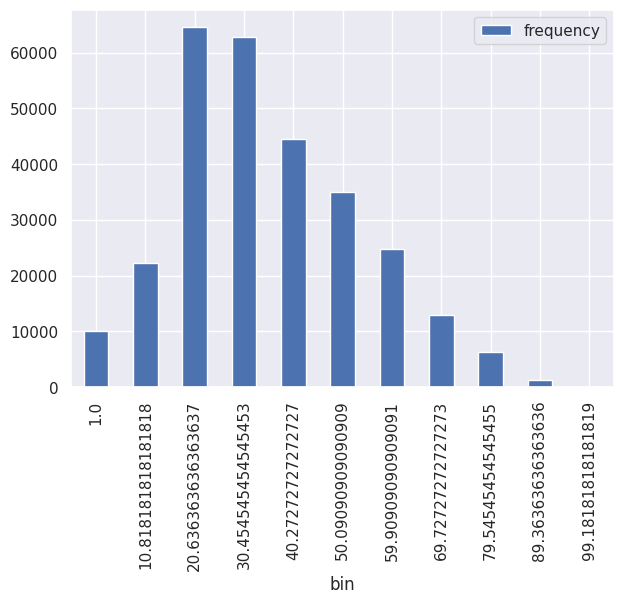

In [42]:
#3.4 Distribucion Edad
Edad_histogram = df.select('Edad').rdd.flatMap(lambda x: x).histogram(11)

pd.DataFrame(
    list(zip(*Edad_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [ ]:
#3.6 Como insentivar metodologias de autocuidado en personas con un rango de edad entre 20 y 35 años para asi conseguir una reduccion del 30% de los casos?